In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from saveload import saveload as sl
from os import path

In [2]:
fname = "BASINAVG1"
trial = 'Test'
fRead = "../Model/PointScale/"+fname+"/Basin_average_water_balance.csv"
WB = pd.read_csv(fRead, skipinitialspace=True)
WB = WB.drop(columns="Unnamed: 36")
WB

,YEAR,DAY,PREACC,EVAPACC,ROFACC,ROFOACC,ROFSACC,ROFBACC,DSTGACC,PRE,...,LQWS3,FRWS3,ALWS3,LQWS,FRWS,ALWS,LZS,DZS,STG,DSTG
0,1997,274,0.000,0.226403,0.103875,0.000000,0.0,0.103875,-0.171600,0.00000,...,416.0879,0.0,416.0879,439.3023,21.81362,461.1159,0.0,0.0,488.8094,-0.171600
1,1997,275,0.000,0.757024,0.206737,0.000000,0.0,0.206737,-0.381043,0.00000,...,415.7220,0.0,415.7220,448.1104,19.02955,467.1400,0.0,0.0,488.3907,-0.418701
2,1997,276,0.000,1.214409,0.308593,0.000000,0.0,0.308593,-0.647369,0.00000,...,415.3529,0.0,415.3529,458.3123,13.91341,472.2257,0.0,0.0,487.8006,-0.590088
3,1997,277,0.000,1.738417,0.409752,0.000000,0.0,0.409752,-0.932556,0.00000,...,415.1237,0.0,415.1237,462.1059,11.39474,473.5007,0.0,0.0,487.1926,-0.608032
4,1997,278,0.000,1.943360,0.510566,0.000000,0.0,0.510566,-1.200653,0.00000,...,415.0489,0.0,415.0489,462.7501,11.26418,474.0143,0.0,0.0,486.7085,-0.484131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2000,270,1322.370,1143.462000,193.962400,7.749230,0.0,186.213900,26.250920,0.00000,...,412.3145,0.0,412.3145,474.4147,0.00000,474.4147,0.0,0.0,474.4156,-0.526031
1092,2000,271,1401.983,1144.833000,194.073700,7.749230,0.0,186.325200,26.226200,79.61221,...,414.5600,0.0,414.5600,488.3590,0.00000,488.3590,0.0,0.0,488.5578,14.142120
1093,2000,272,1405.370,1146.095000,194.304800,7.749291,0.0,186.556300,26.262450,3.38775,...,447.2191,0.0,447.2191,554.4460,0.00000,554.4460,0.0,0.0,554.6861,66.128330
1094,2000,273,1405.370,1147.099000,194.681500,7.749291,0.0,186.933000,26.297240,0.00000,...,472.0188,0.0,472.0188,553.3159,0.00000,553.3159,0.0,0.0,553.3189,-1.367188


In [3]:
WB.columns

Index(['YEAR', 'DAY', 'PREACC', 'EVAPACC', 'ROFACC', 'ROFOACC', 'ROFSACC',
       'ROFBACC', 'DSTGACC', 'PRE', 'EVAP', 'ROF', 'ROFO', 'ROFS', 'ROFB',
       'SNCAN', 'RCAN', 'SNO', 'WSNO', 'PNDW', 'LQWS1', 'FRWS1', 'ALWS1',
       'LQWS2', 'FRWS2', 'ALWS2', 'LQWS3', 'FRWS3', 'ALWS3', 'LQWS', 'FRWS',
       'ALWS', 'LZS', 'DZS', 'STG', 'DSTG'],
      dtype='object')

In [4]:
# Plot total water balance

# Prep the dataframe
index = pd.date_range('1997-10-01', periods = len(WB), freq="D")
index

WB2 = WB[['PRE', 'EVAP', 'ROF', 'ROFO', 'ROFS', 'ROFB']]
WB2.index = index

WB2 = WB2.resample('Y').sum()
WB2['dS'] = WB2['PRE'] - WB2['EVAP'] - WB2['ROF']
WB2
WB2['negdS'] = np.where(WB2['dS'] < 0, WB2['dS']*-1, 0)
WB2['posdS'] = np.where(WB2['dS'] > 0, WB2['dS'], 0)
WB2


,PRE,EVAP,ROF,ROFO,ROFS,ROFB,dS,negdS,posdS
1997-12-31,138.000016,30.653664,22.441794,7.696244,0.0,14.745549,84.904558,0.000000,84.904558
1998-12-31,409.185757,411.990874,59.863053,0.011707,0.0,59.851346,-62.668171,62.668171,0.000000
1999-12-31,488.131293,381.008761,78.267635,0.020521,0.0,78.247114,28.854896,0.000000,28.854896
2000-12-31,370.053433,324.092746,34.546227,0.020828,0.0,34.525399,11.414460,0.000000,11.414460


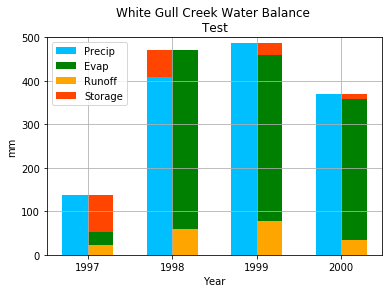

In [5]:
# Make the plots

w = 0.3
a = 'edge'
x = WB2.index.year
 
plt.bar(x, WB2['negdS'], align=a, width=-w, color='orangered', bottom=WB2['PRE'])
plt.bar(x, WB2['PRE'], align=a, width=-w, label='Precip', color='deepskyblue')
plt.bar(x, WB2['EVAP'], align=a, width=w, label='Evap', bottom=WB2['ROF'], color='g')
plt.bar(x, WB2['ROF'], align=a, width=w, label='Runoff', color='orange')
plt.bar(x, WB2['posdS'], align=a, width=w, color='orangered', label='Storage', bottom=WB2['EVAP']+WB2['ROF'])
plt.legend(loc='upper left')
plt.grid()
plt.xticks(x)
plt.xlabel('Year')
plt.ylabel('mm')
plt.title('White Gull Creek Water Balance \n'+trial)
plt.ylim(0, 500)
# plt.figure(num=None, figsize=(16, 12), dpi=80)
plt.savefig(trial+'.png', dpi=200)
plt.show()

In [184]:
# Create a table of totals for each variable (precip, evaporation, runoff (overland, interflow, and baseflow), 
# and change in storage)
P_tot = WB['PREACC'][WB.index[-1]]
E_tot = WB['EVAPACC'][WB.index[-1]]
RO_tot = WB['ROFACC'][WB.index[-1]]
RO_tot_Overland = WB['ROFOACC'][WB.index[-1]]
RO_tot_Interflow = WB['ROFSACC'][WB.index[-1]]
RO_tot_Baseflow = WB['ROFBACC'][WB.index[-1]]
E_tot = WB['EVAPACC'][WB.index[-1]]
dS = P_tot - E_tot - RO_tot
dS

data = [['Total Precip', P_tot], ['Total Evap', E_tot], ['Total Runoff', RO_tot], ['Total Overland', RO_tot_Overland], 
        ['Total Interflow', RO_tot_Interflow], ['Total Baseflow ', RO_tot_Baseflow], ['Delta Storage', dS]]
Summary = pd.DataFrame(data, columns = ['Variable', 'Value'])
Summary.index = Summary.Variable
del Summary['Variable']
Summary


,Value
Variable,
Total Precip,1405.370000
Total Evap,1146.812000
Total Runoff,195.739000
Total Overland,7.582089
Total Interflow,0.000000
Total Baseflow,188.157200
Delta Storage,62.819000


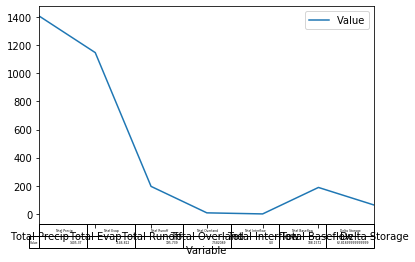

In [210]:
# Save the totals table to a html file
from pandas.plotting import table
# ax = plt.subplot(111, frame_on=False)
# table(Summary, cellText=Summary.Value, rowLabels=Summary.index, colLables=Summary.columns)
# table(ax, Summary)
# table()

# Summary.to_png(Trial+'.png')